In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/googlepixel6A.csv')
data.head()

,Unnamed: 0,name,review
0,0,rupam dhara,good phone price rang batteri backup good came...
1,1,soumadip mondal,nice mobil perform good camera qualiti good go...
2,2,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...
3,3,kuldeep singh,good phone nice work good perform nice lookread
4,4,nilesh gaidhani,phone camera good use first phone buyerbatteri...


In [4]:
data.shape

(390, 3)

In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.6 MB/s eta 0:00:00


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [7]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [8]:
def sentiment_score(rev):
    tokens = tokenizer.encode(rev, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [9]:
data['sentiment'] = data['review'].apply(lambda x: sentiment_score(x[:len(x)]))

In [10]:
for i in range(0,390):
  if data['sentiment'][i]==2:
    data['sentiment'][i]='negative'
  elif data['sentiment'][i]==3:
    data['sentiment'][i]='neutral'
  else:
    data['sentiment'][i]='Good'


In [11]:
data['sentiment'].value_counts()

Good        333
neutral      42
negative     15
Name: sentiment, dtype: int64

<Axes: >

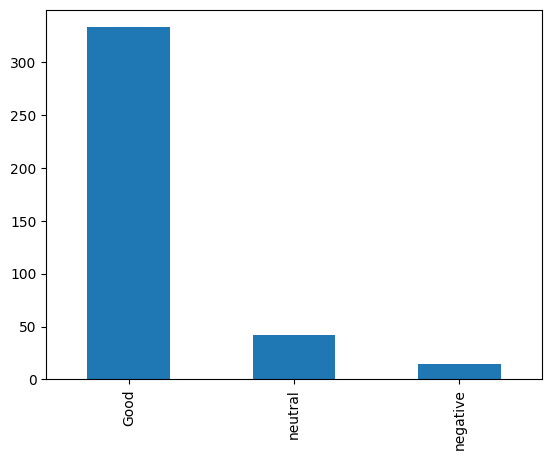

In [12]:
# Importing the Graph as No. of different sentiments as per the polarity for this particular phone
data['sentiment'].value_counts().plot(kind='bar')

#Basic emotions
#1)Joy
#2)Trust
#3)Sadness
#4)Anticipation
#5)Anger
#6)Fear
#7)Suprise
#8)Disguist

# Combination of such emotions are-
#1)Joy+Trust= Love
#2)Joy+Fear = Guilt
#3)Joy+Suprise = Delight
#4)Trust+Fear = Curiosity
#5)Trust+Suprise = Sentimentally
#6)Trust+Sadness = Dispair
#7)Fear+Suprise = Awe
#8)Fear+Sadness = Despair
#9)Fear+Disgust = Shame
#10)Suprise+Sadness = Disappoint
#11)Suprise+Disgust = Un belief
#12)Suprise+Anger = Outrage
#13)Sadness+Disgust = Curiosity
#14)Sadness+Anger = Sentimentally
#15)Sadness+Anticipation= Dispair
#16)Disgust+Anger = Awe
#17)Disgust+Anticipation = cynisim 
#18)Anger+Anticipation = Agression
#19)Anger+Joy= Pride
#20)Anger+Trust = Dominance
#21)Anticipation+Joy = Optimisim
#22)Anticipation+Trust = Hope
#23)Anticipation+Fear = Anxiety


In [13]:
# Emotion Synonym
# Trust=['trust','confidence','faith','certainty','credence','assurance','stock','conviction','acceptance']
# Joy-[joy,happiness,bliss,blissfulness,joyfulness,enjoyment,pleasure,gladness,beatitude]
# Anticipation- [anticipation,apprehension,hope,prospect,contemplation,expectancy,foresight,foretaste]
# Anger-[anger,annoyed,bitter,enraged,exasperated,furious,heated,impassioned,indignant]
# Sadness-[sadness,unhappy,heartbroken,depressed,miserable,sorry,bad,melancholy,upset]
# Suprise-[suprise,amazement,astonishment,shock,confusion,startlement,stupefaction,awe,wonder]
# Disgust-[disgust,antipathy,aversion,dislike,distaste,hatred,loathing,repulsion,revulsion]
# Fear-[fear,foreboding, apprehension, consternation, dismay, dread, terror, fright, panic, horror, trepidation, qualm,phobia, aversion; bête noire, bogy, bogey, bugbear]

In [14]:
for i in data['review']:
  for j in i:
    if j=='trust' or j =='confidence' or j=='faith' or j=='certainty' or j=='credence' or j=='assurance' or j=='stock' or j=='acceptance':
      i.replace(j,'trust')
    
    if j=='joy' or j=='happiness' or j=='bliss' or j=='blissfulness' or j=='joyfulness' or j=='enjoyment' or j=='pleasure' or j=='gladness' or j=='beatitude':
      i.replace(j,'joy')

    if j=='anticipation' or j=='apprehension' or j=='hope' or j=='prospect' or j=='contemplation' or j=='expectancy' or j=='foresight' or j=='foretaste':
      i.replace(j,'anticipation')

    if j=='anger' or j=='annoyed' or j=='bitter' or j=='enraged' or j=='exasperated' or j=='furious' or j=='heated' or j=='impassioned' or j=='indignant':
      i.replace(j,'anger')
    
    if j=='sadness' or j=='unhappy' or j=='heartbroken' or j=='depressed' or j=='miserable' or j=='sorry' or j=='bad' or j=='melancholy' or j=='upset':
      i.replace(j,'sadness')

    if j=='suprise' or j=='amazement' or j=='astonishment' or j=='shock' or j=='confusion' or j=='startlement' or j=='stupefaction' or j=='awe' or j=='wonder':
      i.replace(j,'suprise')
    
    if j=='disgust' or j=='antipathy' or j=='aversion' or j=='dislike' or j=='distaste' or j=='hatred' or j=='loathing' or j=='repulsion' or j=='revulsion':
      i.replace(j,'disgust')

    if j=='fear' or j=='foreboding' or j=='apprehension' or  j=='consternation' or j=='dismay'  or j=='dread' or  j=='terror'  or j=='horror':
      i.replace(j,'fear')

In [15]:
data['review']

0      good phone price rang batteri backup good came...
1      nice mobil perform good camera qualiti good go...
2      mobil best price rangeprocessor qualcomm snapd...
3        good phone nice work good perform nice lookread
4      phone camera good use first phone buyerbatteri...
                             ...                        
385                               bad camera qualityread
386                              camera qualiti poorread
387    receiv mobil mobil box damag box uppar side bl...
388                           nice color camera goodread
389                                action mobil niceread
Name: review, Length: 390, dtype: object

In [16]:
import nltk
!pip install NRCLex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43327 sha256=f392982a0082a572894508cd9d19dd0133d0ddbc170fca5c2ea3a08f7a286159
  Stored in directory: /root/.cache/pip/wheels/68/c4/f2/c390dd3eac398fdf45f7a01c6516bc53fa7a9ab59c7d2ff518
Successfully built NRCLex


In [17]:
from nrclex import NRCLex

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
emotion=[]
for i in data['review']:
  emo=NRCLex(i)
  emotion.append(emo.top_emotions)

In [23]:
emotion

[[('positive', 0.23529411764705882), ('joy', 0.23529411764705882)],
 [('positive', 0.23529411764705882), ('joy', 0.23529411764705882)],
 [('trust', 0.2222222222222222),
  ('positive', 0.2222222222222222),
  ('joy', 0.2222222222222222),
  ('anticipation', 0.2222222222222222)],
 [('trust', 0.2),
  ('surprise', 0.2),
  ('positive', 0.2),
  ('joy', 0.2),
  ('anticipation', 0.2)],
 [('trust', 0.2),
  ('surprise', 0.2),
  ('positive', 0.2),
  ('joy', 0.2),
  ('anticipation', 0.2)],
 [('trust', 0.25)],
 [('fear', 0.0),
  ('anger', 0.0),
  ('anticip', 0.0),
  ('trust', 0.0),
  ('surprise', 0.0),
  ('positive', 0.0),
  ('negative', 0.0),
  ('sadness', 0.0),
  ('disgust', 0.0),
  ('joy', 0.0)],
 [('positive', 1.0)],
 [('positive', 0.25806451612903225)],
 [('trust', 0.2)],
 [('positive', 0.375)],
 [('positive', 0.2608695652173913)],
 [('positive', 0.3333333333333333)],
 [('trust', 0.1875), ('positive', 0.1875)],
 [('positive', 0.2608695652173913)],
 [('anticipation', 0.26666666666666666)],
 [('po

In [25]:
len(emotion)

390

In [26]:
data['emotions']=emotion

In [27]:
data.head()

,Unnamed: 0,name,review,sentiment,emotions
0,0,rupam dhara,good phone price rang batteri backup good came...,Good,"[(positive, 0.23529411764705882), (joy, 0.2352..."
1,1,soumadip mondal,nice mobil perform good camera qualiti good go...,Good,"[(positive, 0.23529411764705882), (joy, 0.2352..."
2,2,rahul dhochak,mobil best price rangeprocessor qualcomm snapd...,Good,"[(trust, 0.2222222222222222), (positive, 0.222..."
3,3,kuldeep singh,good phone nice work good perform nice lookread,Good,"[(trust, 0.2), (surprise, 0.2), (positive, 0.2..."
4,4,nilesh gaidhani,phone camera good use first phone buyerbatteri...,Good,"[(trust, 0.2), (surprise, 0.2), (positive, 0.2..."


In [28]:
data['emotions'].value_counts()

[(fear, 0.0), (anger, 0.0), (anticip, 0.0), (trust, 0.0), (surprise, 0.0), (positive, 0.0), (negative, 0.0), (sadness, 0.0), (disgust, 0.0), (joy, 0.0)]    166
[(trust, 0.2), (surprise, 0.2), (positive, 0.2), (joy, 0.2), (anticipation, 0.2)]                                                                            73
[(fear, 0.2), (anger, 0.2), (negative, 0.2), (sadness, 0.2), (disgust, 0.2)]                                                                                 13
[(positive, 1.0)]                                                                                                                                            11
[(positive, 0.3333333333333333)]                                                                                                                              6
                                                                                                                                                           ... 
[(anticipation, 0.3)]                   

In [29]:
import matplotlib.pyplot as plt

In [34]:
data['emotions'].sum()

[('positive', 0.23529411764705882),
 ('joy', 0.23529411764705882),
 ('positive', 0.23529411764705882),
 ('joy', 0.23529411764705882),
 ('trust', 0.2222222222222222),
 ('positive', 0.2222222222222222),
 ('joy', 0.2222222222222222),
 ('anticipation', 0.2222222222222222),
 ('trust', 0.2),
 ('surprise', 0.2),
 ('positive', 0.2),
 ('joy', 0.2),
 ('anticipation', 0.2),
 ('trust', 0.2),
 ('surprise', 0.2),
 ('positive', 0.2),
 ('joy', 0.2),
 ('anticipation', 0.2),
 ('trust', 0.25),
 ('fear', 0.0),
 ('anger', 0.0),
 ('anticip', 0.0),
 ('trust', 0.0),
 ('surprise', 0.0),
 ('positive', 0.0),
 ('negative', 0.0),
 ('sadness', 0.0),
 ('disgust', 0.0),
 ('joy', 0.0),
 ('positive', 1.0),
 ('positive', 0.25806451612903225),
 ('trust', 0.2),
 ('positive', 0.375),
 ('positive', 0.2608695652173913),
 ('positive', 0.3333333333333333),
 ('trust', 0.1875),
 ('positive', 0.1875),
 ('positive', 0.2608695652173913),
 ('anticipation', 0.26666666666666666),
 ('positive', 0.2857142857142857),
 ('positive', 0.3076

In [36]:
datafr=pd.DataFrame(data['emotions'].sum())
datafr.head()

,0,1
0,positive,0.235294
1,joy,0.235294
2,positive,0.235294
3,joy,0.235294
4,trust,0.222222
